In [29]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pandas_montecarlo
from MCForecastTools import MCSimulation

In [30]:
sales_df=pd.read_csv("C:/Users/bmccr/SMU_FinTech/Project_2/Project_2/Data/sales_promo_data.csv", parse_dates=True, index_col = "Category", dtype = np.float64)

In [31]:
sales_df.head()

,5-Jan-19,12-Jan-19,19-Jan-19,26-Jan-19,2-Feb-19,9-Feb-19,16-Feb-19,23-Feb-19,2-Mar-19,9-Mar-19,...,19-Apr-21,26-Apr-21,3-May-21,10-May-21,17-May-21,24-May-21,31-May-21,7-Jun-21,14-Jun-21,21-Jun-21
Category,,,,,,,,,,,,,,,,,,,,,
Acne,14969813.0,15488855.0,15522357.0,15054219.0,14585357.0,14753443.0,14809032.0,15195875.0,16148805.0,15761762.0,...,6804803.45,6338797.51,6221003.71,6161488.20,6484463.04,6622980.76,6564619.3,6727304.43,6976630.14,6852588.56
acne_promo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
Baby,1417338.0,1515492.0,1562793.0,1555259.0,1638797.0,1531476.0,1454065.0,1658709.0,1854319.0,1660044.0,...,164551.25,135085.59,133168.42,131380.27,151697.29,135258.65,131589.5,143072.75,155263.75,132207.15
baby_promo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
Bath,55558.0,59528.0,56189.0,56073.0,60760.0,61017.0,60160.0,67015.0,74080.0,77225.0,...,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN


In [32]:
sales_df = sales_df.reset_index()

In [33]:
sales_df=sales_df.rename(columns={"Category":"Date"})

In [34]:
sales_df=sales_df.T

In [35]:
sales_df.columns= sales_df.iloc[0]

In [36]:
sales_df=sales_df.iloc[1:,:]
sales_df.head()

Date,Acne,acne_promo,Baby,baby_promo,Bath,bath_promo,Body Wash,body_promo,Hair,hair_promo,Lotion,lotion_promo,Makeup,makeup_promo,Shaving,shaving_promo,Sunscreen,sunscreen_promo,Tanner,tanner_promo
5-Jan-19,1.49698e+07,0,1.41734e+06,0,55558,0,1.49122e+06,0,929666,0,3.22783e+06,0,7.15666e+06,0,273010,0,1.66175e+06,0,84682,0
12-Jan-19,1.54889e+07,0,1.51549e+06,0,59528,0,1.59943e+06,0,1.04239e+06,0,3.55188e+06,0,7.18866e+06,0,283501,0,1.43475e+06,0,78632,0
19-Jan-19,1.55224e+07,0,1.56279e+06,0,56189,0,1.40911e+06,0,1.04888e+06,0,3.43581e+06,0,7.17324e+06,0,266646,0,1.42346e+06,0,81813,0
26-Jan-19,1.50542e+07,0,1.55526e+06,0,56073,0,1.38705e+06,0,1.10439e+06,0,3.40686e+06,0,6.85142e+06,0,264479,0,1.36637e+06,0,82477,0
2-Feb-19,1.45854e+07,0,1.6388e+06,0,60760,0,1.47958e+06,0,1.23534e+06,0,3.75449e+06,0,6.74574e+06,0,265783,0,1.49604e+06,0,89832,0


In [37]:
sales_df.index = pd.to_datetime(sales_df.index)

In [56]:
acne_df= sales_df[["Acne","acne_promo"]]
baby_df= sales_df[["Baby","baby_promo"]]
bath_df= sales_df[["Bath","bath_promo"]]
body_df= sales_df[["Body Wash","body_promo"]]
hair_df= sales_df[["Hair","hair_promo"]]
lotion_df= sales_df[["Lotion","lotion_promo"]]
makeup_df= sales_df[["Makeup","makeup_promo"]]
shaving_df= sales_df[["Shaving","shaving_promo"]]
sunscreen_df= sales_df[["Sunscreen","sunscreen_promo"]]
tanner_df= sales_df[["Tanner","tanner_promo"]]

In [57]:
acne_df_mc = acne_df
acne_df_mc["pct_change"] = acne_df[["Acne"]].pct_change()
acne_df_mc.drop("acne_promo", axis = 1, inplace = True)
acne_df_mc.dropna(inplace = True)
acne_df_mc.head()

<ipython-input-57-3343c9a2180b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acne_df_mc["pct_change"] = acne_df[["Acne"]].pct_change()
C:\Users\bmccr\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-57-3343c9a2180b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acne_df_mc.dropna(inplace

Date,Acne,pct_change
2019-01-12,1.54889e+07,0.034673
2019-01-19,1.55224e+07,0.002163
2019-01-26,1.50542e+07,-0.030159
2019-02-02,1.45854e+07,-0.031145
2019-02-09,1.47534e+07,0.011524


In [58]:
acne_df_mc

Date,Acne,pct_change
2019-01-12,1.54889e+07,0.034673
2019-01-19,1.55224e+07,0.002163
2019-01-26,1.50542e+07,-0.030159
2019-02-02,1.45854e+07,-0.031145
2019-02-09,1.47534e+07,0.011524
...,...,...
2021-05-24,6.62298e+06,0.021361
2021-05-31,6.56462e+06,-0.008812
2021-06-07,6.7273e+06,0.024782
2021-06-14,6.97663e+06,0.037062


In [50]:
acne_df_mc.columns = pd.MultiIndex.from_tuples(map(lambda x: (x[1], 'close'), acne_df_mc.columns))

AttributeError: 'MultiIndex' object has no attribute 'columns'

In [40]:
mc_fiveyear = MCSimulation(acne_df_mc, num_simulation = 1000, num_trading_days = 52)

IndexError: Too many levels: Index has only 1 level, not 2

In [27]:
mc = acne_df_mc["pct_change"].montecarlo(sims = 10, bust = -0.1, goal = 1)

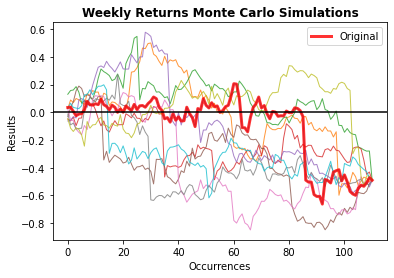

In [28]:
mc.plot(title = "Weekly Returns Monte Carlo Simulations")

In [19]:
print(mc.stats)

{'min': -0.49033799097393194, 'max': -0.49033799097393194, 'mean': -0.49033799097393194, 'median': -0.49033799097393194, 'std': 0.0, 'maxdd': -0.995448141673321, 'bust': 1.0, 'goal': 0.0}
